# ML for Econ Analysis Project 1 - Peru
name here
## 1 Problem Description
blablablabla


In [1]:
# install packages
# !pip install scikit-neuralnetwork
# !pip install lightgbm
# ! pip install mlxtend
# ! pip install yellowbrick

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
#Import everything
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import normal as rnorm
import itertools
import time
import statsmodels.api as sm
import random

# for plot
import seaborn as sns
#stata-like output
import statsmodels.api as sm
import statsmodels.formula.api as smf

#for missing values
import missingno as msno
from sklearn.impute import SimpleImputer

In [2]:
 #regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [3]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# import yellowbrck for graphs
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor.alphas import alphas

# Set global parameters
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

# 2 Data Preprocessing
to check the missing value of data, visulize the data to get a "feel", and normalize the data

## 2.1 Dataset acquisition
we use pd.read_csv to read the csv file as dataframe data type.

In [32]:
# Peru data
peru = pd.read_csv('datasets/Project1_CompletaData_96.csv')
peru.head()
# Overview of all variables
peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Columns: 105 entries, lnpercapitaconsumption to percapitahat_OLS
dtypes: float64(41), int64(64)
memory usage: 37.1 MB


## 2.2 Cleaning the Data
We check our dataset by detecting whether it contains null, Nan values or missing values.

In [5]:
peru.isnull().sum()

lnpercapitaconsumption      0
d_fuel_other                0
d_fuel_wood                 0
d_fuel_coal                 0
d_fuel_kerosene             0
                         ... 
h_hhsize                    0
id_for_matlab               0
hhid                        0
lncaphat_OLS              927
percapitahat_OLS          927
Length: 105, dtype: int64

In [6]:
columnNames = peru.columns.values.tolist()
columnNames[2]

'd_fuel_wood'

In [7]:
peru.loc[25:26,columnNames[22:30]]

,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


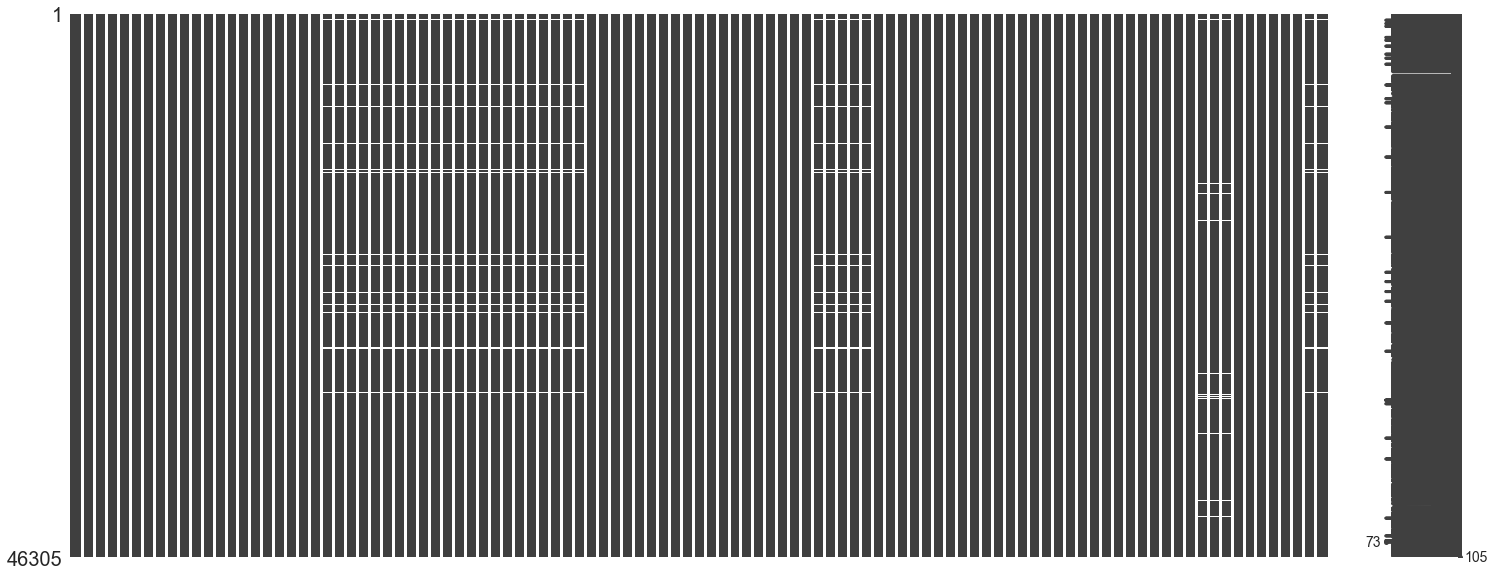

In [9]:
# Visualize no missing values
msno.matrix(peru)

In [8]:
# Visualize the distribution of each feature to get an overview of the dataset.
peru.describe(include='all')

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,refrigerator,washer,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
count,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,...,45306.000000,45306.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,4.630500e+04,45378.000000,45378.000000
mean,5.856564,0.104244,0.307202,0.025656,0.004557,0.518734,0.007796,0.031811,0.041421,0.207947,...,0.360504,0.132565,0.500011,461.243627,0.280207,4.012094,23153.000000,1.869936e+08,5.850041,459.121087
std,0.744232,0.305580,0.461339,0.158108,0.067350,0.499654,0.087952,0.175498,0.199264,0.405843,...,0.480152,0.339108,0.500005,411.392663,0.449105,2.093215,13367.246444,1.111905e+08,0.605646,293.660060
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.250000,0.000000,1.000000,1.000000,1.010110e+05,4.434425,-57.498259
25%,5.344724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,209.500000,0.000000,2.000000,11577.000000,9.080021e+07,5.332906,235.941390
50%,5.876649,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,356.612100,0.000000,4.000000,23153.000000,1.828055e+08,5.871003,404.708715
75%,6.360625,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,578.607700,1.000000,5.000000,34729.000000,2.814050e+08,6.306364,611.242935
max,9.663810,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,15737.630000,1.000000,20.000000,46305.000000,4.035098e+08,7.738163,2132.653600


## 2.3 Split Train-test dataset

In [33]:
trainNaN = peru[peru['training']==1]
# train = trainNaN.dropna()
train=trainNaN.dropna(axis=0, how='any', inplace=False)
# train.isnull().sum().sum()

# train.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

#train.to_csv(r'E:\ML for EconAna\Peru\train_py.csv',index=True ,header=True)


In [34]:
test = peru[peru['training']==0]
test.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,refrigerator,washer,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,5.351858,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0,211.0000,0,1,1,233710511,5.246471,284.42427
1,5.768755,0,0,0,0,1,0,0,0,0,...,1.0,0.0,0,320.1389,0,3,2,295508011,6.129468,522.88406
2,5.968277,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0,390.8318,0,4,3,257600211,6.665577,878.49612
3,5.654599,0,0,0,0,1,0,0,0,0,...,NaN,NaN,0,285.6018,1,9,4,198104311,6.088294,567.47054
4,4.771289,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0,118.0713,1,8,5,24805311,5.008170,115.49293


In [35]:
x_train = train.iloc[:,1: 97]
x_train1 = train.iloc[:,1: 97]
x_test = test.iloc[:,1: 97]
x_train.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_dominio_3,d_dominio_4,d_dominio_5,d_dominio_6,d_dominio_7,internet,cable,computer,refrigerator,washer
23152,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
23153,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1.0,1.0,1.0
23154,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
23155,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
23156,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.0,0.0,0.0


In [36]:
y_train = train.loc[:,'percapitaconsumption']
lny_train = train.loc[:,'lnpercapitaconsumption']
y_test = test.loc[:,'percapitaconsumption']
lny_test = test.loc[:,'lnpercapitaconsumption']

##impute the missing values and export it to the current directory
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(x_test)
x_test = pd.DataFrame(imr.transform(x_test))
x_test.to_csv(r'Datasets\x_test_96.csv',index=True ,header=True)

In [37]:
# import x_test data
x_test = pd.read_csv('datasets/x_test_96.csv')
x_test1 = pd.read_csv('datasets/x_test_96.csv')
x_test.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_dominio_3,d_dominio_4,d_dominio_5,d_dominio_6,d_dominio_7,internet,cable,computer,refrigerator,washer
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
print(np.any(np.isnan(x_test)))
print(np.all(np.isfinite(x_test)))
print(np.any(np.isinf(x_test)))

False
True
False


In [15]:
x_test.isnull().sum()

d_fuel_other       0
d_fuel_wood        0
d_fuel_coal        0
d_fuel_kerosene    0
d_fuel_gas         0
                  ..
internet           0
cable              0
computer           0
refrigerator       0
washer             0
Length: 96, dtype: int64

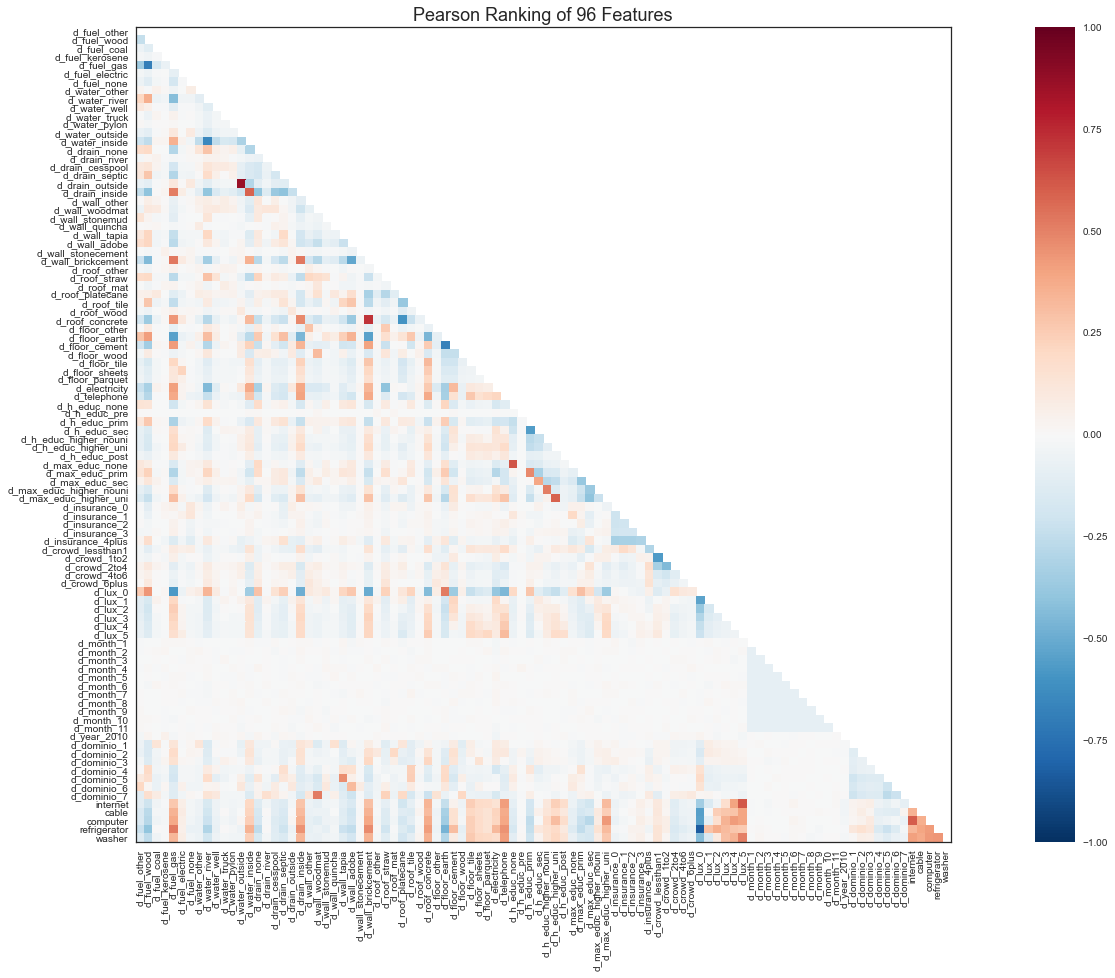

<AxesSubplot:title={'center':'Pearson Ranking of 96 Features'}>

In [16]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')
fig=plt.gcf()
fig.set_size_inches(30,15)
visualizer.fit(x_train, y_train)           # Fit the data to the visualizer
visualizer.transform(x_train)        # Transform the data
visualizer.show()

In [19]:
x_test.shape

(23152, 96)

In [20]:
x_train.shape

(22191, 96)

# 3 Model implementation
## 3.1 Replicate the original paper(Peru): OLS

In [21]:
# add constant for train_x
x_train_72 = train.iloc[:,1: 73]
x_test_72 = x_test.iloc[:,0: 72]
one = np.ones(np.shape(x_train_72))
x_train_withcons = np.concatenate([one,x_train_72],axis=1)
# add constant for test_x
one = np.ones(np.shape(x_test_72))
x_test_withcons = np.concatenate([one,x_test_72],axis=1)

In [22]:
x_train_72.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5
23152,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
23153,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0,0,0,0,1,0
23154,0,1,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0
23155,0,1,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0
23156,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0


In [23]:
x_test_72.head()

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [24]:
# linear regression with constant
linreg = LinearRegression()
ols = linreg.fit(x_train_withcons,y_train)

In [25]:
ols.coef_

array([-3.12256229e+10, -5.03391773e+15,  2.99299831e+15,  6.10481641e+15,
       -4.16245416e+15,  8.83051527e+15, -2.56013196e+15,  5.64440096e+14,
       -1.45623568e+15,  4.01206398e+14, -4.51309780e+14,  1.86113021e+15,
        1.40745341e+15, -1.67251797e+15, -1.76925109e+15,  1.60586686e+15,
       -3.00027099e+14, -4.13841222e+14,  1.46717124e+14,  2.04521644e+14,
       -5.81132430e+14,  4.22871475e+14, -2.96690516e+14, -1.19893161e+15,
        3.97251228e+14,  1.14321197e+15,  4.78978085e+13,  7.75875956e+14,
        9.10229697e+14,  7.52377309e+14,  6.25624845e+14, -2.94743112e+14,
        1.07649475e+14, -3.44936365e+14, -2.61241543e+14,  3.62813631e+14,
       -1.69939942e+14, -2.99010871e+14,  3.74617224e+14, -1.48977457e+14,
        7.59097342e+13,  2.98900125e+14,  6.18257541e+14,  7.22708745e+14,
       -3.98493008e+14,  6.18409144e+14,  4.92349361e+14,  1.06247324e+14,
        2.05091041e+14,  1.17193528e+14, -3.27338199e+13, -1.88755098e+14,
       -6.41510459e+13, -

In [26]:
ols_estimate_y = ols.predict(x_train_withcons)
ols_estimate_y

array([445., 805., 199., ..., 389., 329., 758.])

In [27]:
ols_pred_y = ols.predict(x_test_withcons)

In [28]:
# Linear regression by using Stata Model
x = sm.add_constant(x_train)
model2=sm.OLS(y_train,x)
results=model2.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,271.5376,14.141,19.203,0.000,243.821,299.254
d_fuel_other,-100.4283,8.378,-11.987,0.000,-116.851,-84.006
d_fuel_wood,-89.2030,7.219,-12.357,0.000,-103.353,-75.053
d_fuel_coal,-40.1382,11.701,-3.430,0.001,-63.073,-17.203
d_fuel_kerosene,-57.9007,25.350,-2.284,0.022,-107.588,-8.213
d_fuel_gas,-15.6770,6.562,-2.389,0.017,-28.540,-2.814
d_fuel_electric,436.4550,20.089,21.726,0.000,397.079,475.831
d_fuel_none,138.4298,11.108,12.462,0.000,116.658,160.202
d_water_other,34.2105,9.082,3.767,0.000,16.408,52.013
d_water_river,15.3014,6.012,2.545,0.011,3.518,27.085


## Calculate MSE-OLS

In [29]:
#calculate MSE for the training dataset (from the estimation of original paper)
from sklearn import metrics

metrics.mean_squared_error(train.lncaphat_OLS,train.lnpercapitaconsumption)

0.1919835924821717

In [30]:
#calculate MSE for the training dataset (Original Paper)
metrics.mean_squared_error(train.percapitahat_OLS,train.percapitaconsumption)

77167.47406692483

In [31]:
#calculate MSE for y in the testing dataset (Original Paper)
original_pred_y = pd.DataFrame(test.percapitahat_OLS)
NaNy = original_pred_y.join(y_test)
NaNy=NaNy.dropna(axis=0, how='any', inplace=False)
NaNy.head()
print(NaNy.shape)
mse_ols_y = metrics.mean_squared_error(NaNy.percapitahat_OLS,NaNy.percapitaconsumption)
print(mse_ols_y)

(22704, 2)
89689.4794288619


In [32]:
#calculate MSE for lny in the testing dataset (Original Paper)
original_pred_lny = pd.DataFrame(test.lncaphat_OLS)
NaNlny = original_pred_lny.join(lny_test)
NaNlny=NaNlny.dropna(axis=0, how='any', inplace=False)
NaNlny.head()
print(NaNlny.shape)
mse_ols_lny = metrics.mean_squared_error(NaNlny.lncaphat_OLS,NaNlny.lnpercapitaconsumption)
print(mse_ols_lny)

(22704, 2)
0.1908680255424893


In [33]:
#calculate MSE for the training dataset (my calculation)
metrics.mean_squared_error(ols_estimate_y,y_train)

77192.08104485337

In [34]:
#calclulate MSE for the testing dataset (my calculation)
metrics.mean_squared_error(ols_pred_y, y_test)

6.358591436402691e+26

## Model - Lasso

In [35]:
## 2.5  Create new variables
#交互 x_train and x_test里所有的column,两两相乘

for i in range(0,96):
    a=i
    for j in range(a+1,96):
            x_train1['interaction'+str(i)+str('t')+str(j)]=x_train1.iloc[:,i]* x_train1.iloc[:,j]

In [36]:
#x_test 交互
for i in range(0,96):
    a=i
    for j in range(a+1,96):
            x_test1['interaction'+str(i)+str('t')+str(j)]=x_test1.iloc[:,i]* x_test1.iloc[:,j]

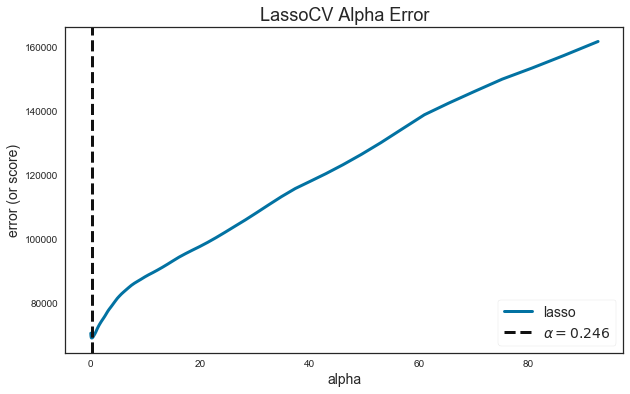

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000184E0D99C08>,
               is_fitted='auto', model=None)

In [37]:
alphas(LassoCV(random_state=0), x_train1, y_train)

In [38]:
lassocv = LassoCV(alphas = [0.185,0.19,0.193,0.2,0.21,0.24],cv=10)
lassocv.fit(x_train1, y_train)

LassoCV(alphas=[0.185, 0.19, 0.193, 0.2, 0.21, 0.24], copy_X=True, cv=10,
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [39]:
lassocv.alpha_

0.21

In [40]:
lasso_estimate_y = lassocv.predict(x_train1)
metrics.mean_squared_error(lasso_estimate_y,y_train)

61528.5635551761

In [41]:
lasso_pred_y = lassocv.predict(x_test1)
mse_lasso_y = metrics.mean_squared_error(lasso_pred_y,y_test)
print(mse_lasso_y)

80288.03171922367


In [42]:
# lny
ln_lassocv = LassoCV(alphas = [0.0001,0.001,0.1,0.2,0.5],cv=10)
ln_lassocv.fit(x_train1, lny_train)

LassoCV(alphas=[0.0001, 0.001, 0.1, 0.2, 0.5], copy_X=True, cv=10, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [43]:
ln_lassocv.alpha_

0.001

In [44]:
lasso_pred_lny = ln_lassocv.predict(x_test1)

In [45]:
mse_lasso_lny = metrics.mean_squared_error(lasso_pred_lny,lny_test)
print(mse_lasso_lny)  ## alpha 0.001 mse: 0.18047432116868548

0.18047432116868548


## 3.2 Model-KNN Regression
Not sure if it is a suitable algorithm for our dataset since all the features are dummies, and it is hard to define/calculate the "distance".
But we will see...

In [17]:
random.seed(30)
sfs = SFS(KNeighborsRegressor(), 
         k_features= (30, 96),
         forward=True,
         floating=False,
         scoring='neg_mean_squared_error',
         cv=5)
sfs.fit(x_train, y_train)
sfs.k_feature_names_

('d_fuel_other',
 'd_fuel_wood',
 'd_fuel_coal',
 'd_fuel_gas',
 'd_fuel_electric',
 'd_fuel_none',
 'd_water_river',
 'd_water_truck',
 'd_water_outside',
 'd_drain_river',
 'd_drain_inside',
 'd_wall_other',
 'd_wall_tapia',
 'd_wall_adobe',
 'd_roof_other',
 'd_roof_straw',
 'd_roof_mat',
 'd_floor_earth',
 'd_floor_tile',
 'd_floor_sheets',
 'd_floor_parquet',
 'd_telephone',
 'd_h_educ_prim',
 'd_h_educ_sec',
 'd_h_educ_higher_nouni',
 'd_h_educ_higher_uni',
 'd_h_educ_post',
 'd_max_educ_none',
 'd_max_educ_prim',
 'd_max_educ_higher_nouni',
 'd_insurance_0',
 'd_insurance_1',
 'd_insurance_2',
 'd_insurance_3',
 'd_insurance_4plus',
 'd_crowd_lessthan1',
 'd_crowd_1to2',
 'd_crowd_2to4',
 'd_lux_0',
 'd_lux_1',
 'd_lux_2',
 'd_lux_3',
 'd_lux_5',
 'd_month_6',
 'd_month_8',
 'd_month_9',
 'd_year_2010',
 'd_dominio_1',
 'd_dominio_2',
 'd_dominio_3',
 'd_dominio_4',
 'd_dominio_5',
 'd_dominio_6',
 'd_dominio_7',
 'internet',
 'cable',
 'refrigerator',
 'washer')

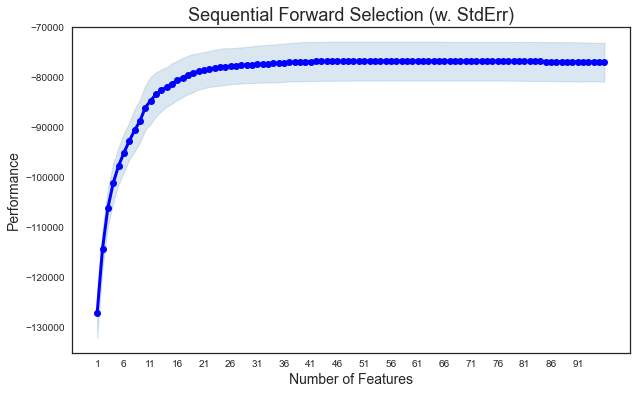

In [18]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
ticks = np.arange(1, 96, 5)
plt.xticks(ticks)
plt.show()

In [19]:
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

In [41]:
x_train_knn.shape

(22191, 58)

In [20]:
x_train_knn = pd.DataFrame(x_train_sfs)
x_test_knn = pd.DataFrame(x_test_sfs)

In [43]:
# create a knn regression model
param_dict = {'n_neighbors':[17, 37, 57], 'weights': ['distance'], 'metric':['hamming']}
knn_gscv = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = param_dict,scoring='neg_mean_squared_error', cv=5)
knn_gscv.fit(x_train_knn, lny_train)
knn_gscv.best_params_

{'metric': 'hamming', 'n_neighbors': 37, 'weights': 'distance'}

In [44]:
# mse for lny
knn_pred_lny = knn_gscv.predict(x_test_knn)
mse_knn_lny = metrics.mean_squared_error(knn_pred_lny, lny_test)
print(mse_knn_lny)

0.21661382233965826


In [50]:
# create a knn regression model
param_dict = {'n_neighbors':[27, 47], 'weights': ['distance'], 'metric':['hamming']}
knn_gscv = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = param_dict,scoring='neg_mean_squared_error', cv=5)
knn_gscv.fit(x_train_knn, lny_train)
print(knn_gscv.best_params_)
# mse for lny
knn_pred_lny = knn_gscv.predict(x_test_knn)
mse_knn_lny = metrics.mean_squared_error(knn_pred_lny, lny_test)
print(mse_knn_lny)

0.2173668397874493


In [47]:
knn_pred_lny.head()

,0
0,5.241353
1,6.251036
2,6.636672
3,5.903685
4,5.123163


In [49]:
# Export the KNN  lny outcomes, k=37
knn_pred_lny = pd.DataFrame(knn_pred_lny)
knn_out_lny_37 = knn_pred_lny.join(test)
knn_out_lny_37.to_csv(r'Datasets\knn_out_lny_37.csv',index=True ,header=True)

In [ ]:
# 分割线 96个变量

In [26]:
train_knn_pred = knn_gscv.predict(x_train_knn)
print(metrics.mean_squared_error(train_knn_pred, y_train))

4480.958555915493


In [27]:
# mse for y
knn_pred_y = knn_gscv.predict(x_test_knn)
mse_knn_y = metrics.mean_squared_error(knn_pred_y, y_test)
print(mse_knn_y)

91224.35833976869


In [31]:
# Export the KNN outcomes
knn_pred_y = pd.DataFrame(knn_pred_y)
knn_out = knn_pred_y.join(test)
knn_out.to_csv(r'Datasets\knn_out.csv',index=True ,header=True)

In [39]:
# create a knn regression model with 96 variables
param_dict = {'n_neighbors':[37], 'weights': ['distance'], 'metric':['hamming']}
knn_gscv = GridSearchCV(estimator=KNeighborsRegressor(), param_grid = param_dict,scoring='neg_mean_squared_error', cv=5)
knn_gscv.fit(x_train, y_train)
knn_gscv.best_params_
train_knn_pred = knn_gscv.predict(x_train)
print(metrics.mean_squared_error(train_knn_pred, y_train))
# mse for y
knn_pred_y = knn_gscv.predict(x_test)
mse_knn_y = metrics.mean_squared_error(knn_pred_y, y_test)
print(mse_knn_y)

453.2725488705401
87421.92661454678


#lny in a knn regression model
knr = KNeighborsRegressor(weights = 'distance', metric = 'hamming')
param_dict = {'n_neighbors': [11, 21, 31, 41]}
knr_gscv = GridSearchCV(knr, param_grid = param_dict, scoring='neg_mean_squared_error', cv=5)
knr_gscv.fit(x_train_knn, lny_train)
knr_gscv.best_params_

## 3.3 SVM Regression (SVR)

In [ ]:
# Code for CV: params_dict={'C':[10,100,300],'gamma':[0.01,0.1,1],'kernel':['rbf']}

# for save time, we directly run the selected best-fitted paramether below

params_dict={'C':[300],'gamma':[0.1],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,y_train)
svr_gscv.best_params_

In [ ]:
# MSE for the training set
svr_estimate_y = svr_gscv.predict(x_train)
metrics.mean_squared_error(svr_estimate_y,y_train)

In [ ]:
# predict for x_test
svr_pred_y = svr_gscv.predict(x_test)
# calculate MSE from the prediction for x_test and y_test
mse_svr_y = metrics.mean_squared_error(svr_pred_y, y_test)  ##300 and 0.1 mse:  ## 846**
print(mse_svr_y)

In [ ]:
# 分割线

In [53]:
# lny
params_dict={'C':[100],'gamma':[0.001],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,lny_train)
print(svr_gscv.best_params_)

# predict for lny 
svr_pred_lny = svr_gscv.predict(x_test)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [54]:
# calculate MSE from the prediction for x_test and y_test
mse_svr_lny = metrics.mean_squared_error(svr_pred_lny, lny_test)
print(mse_svr_lny)

0.17923064710220138


In [55]:
# lny
params_dict={'C':[10],'gamma':[0.0001],'kernel':['rbf']}
svr_gscv=GridSearchCV(estimator=SVR(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=5)
svr_gscv.fit(x_train,lny_train)
print(svr_gscv.best_params_)

# predict for lny 
svr_pred_lny = svr_gscv.predict(x_test)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [56]:
# calculate MSE from the prediction for x_test and y_test
mse_svr_lny = metrics.mean_squared_error(svr_pred_lny, lny_test)
print(mse_svr_lny)

0.1900120514527208


## LightGBM

In [ ]:
x_try = x_train.iloc[0:22673,]
y_try = y_train.iloc[0:22673,]

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31} mse = 80548.2058147445
{'learning_rate': 0.1, 'n_estimators': 95, 'num_leaves': 31} mse = 80570.42558366357
{'learning_rate': 0.1, 'n_estimators': 98, 'num_leaves': 31} mse = 80554.34797504671
{'learning_rate': 0.1, 'n_estimators': 97, 'num_leaves': 31} mse = 80546.35227972006

In [ ]:
# code for cv: params_dict={'num_leaves':[5,10,15,20,25,31],'n_estimators':[20, 40, 60, 80, 97, 100],'learning_rate':[0.01, 0.1, 0.3, 0.5, 0.7]}

# for save time, we directly run the selected best-fitted paramether below
params_dict={'num_leaves':[31],'n_estimators':[97],'learning_rate':[0.01, 0.1, 0.3]}
lgbm_gscv=GridSearchCV(estimator=LGBMRegressor(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
lgbm_gscv.fit(x_try, y_try)
lgbm_gscv.best_params_

In [ ]:
lgbm_pred_y = lgbm_gscv.predict(x_test)

In [ ]:
mse_lgbm_y = metrics.mean_squared_error(lgbm_pred_y, y_test)
print(mse_lgbm_y)

In [ ]:
# prediction for lny
lny_try = lny_train.iloc[0:22673,]
params_dict={'num_leaves':[5,20,31],'n_estimators':[20,50,100,350,500],'learning_rate':[0.01,0.04,0.1,0.5,0.7]}
lgbm_gscv=GridSearchCV(estimator=LGBMRegressor(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
lgbm_gscv.fit(x_try, lny_try)
print(lgbm_gscv.best_params_)
lgbm_pred_lny = lgbm_gscv.predict(x_test)
mse_lgbm_lny = metrics.mean_squared_error(lgbm_pred_lny, lny_test)

In [ ]:
print(mse_lgbm_lny)

## Neural Network

#code for cv: 
params_dict={'hidden_layer_sizes':[(5),(10),(20),(10,8),(10,10),(20,10)]}
clf_nn =GridSearchCV(estimator = neural_network.MLPRegressor(activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=500 ,tol=1e-4),param_grid=params_dict,cv=5)
clf_nn.fit(x_train,y_train)

In [ ]:
#for save time, we directly run the selected best-fitted paramether below
random.seed(30)
clf_nn = MLPRegressor(random_state=1, alpha=0.001,learning_rate_init=0.0008, max_iter=500).fit(x_train, y_train) 
nn_estimate_y=clf_nn.predict(x_train)
metrics.mean_squared_error(nn_estimate_y, y_train)
print (metrics.mean_squared_error)

nn_pred_y=clf_nn.predict(x_test)
mse_nn_y = metrics.mean_squared_error(nn_pred_y, y_test)
print(mse_nn_y)

In [ ]:
nn_pred_y=clf_nn.predict(x_test)
mse_nn_y=metrics.mean_squared_error(nn_pred_y, y_test)
print(mse_nn_y)

In [ ]:
# 分割线

In [57]:
# prediction for lny
params_dict={'hidden_layer_sizes':[(5),(10),(10, 5),(20,10)]}
clf_nn =GridSearchCV(estimator = neural_network.MLPRegressor(activation="relu",
                 solver='adam', alpha=0.3,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=500 ,tol=1e-4),param_grid=params_dict,cv=5)
clf_nn.fit(x_train,lny_train)
print(clf_nn.best_params_)
nn_pred_lny = clf_nn.predict(x_test)
mse_nn_lny = metrics.mean_squared_error(nn_pred_lny, lny_test)
print(mse_nn_lny)

{'hidden_layer_sizes': 10}
0.20206467687168417


#prediction for y
mlpr = MLPRegressor(random_state=1, alpha=0.001,learning_rate_init=0.0008, max_iter=500).fit(x_train, y_train) 

nn_estimate_y=mlpr.predict(x_train)
metrics.mean_squared_error(nn_estimate_y, y_train)
print (metrics.mean_squared_error)

nn_pred_y=mlpr.predict(x_test)
mse_nn_y = metrics.mean_squared_error(nn_pred_y, y_test)
print(mse_nn_y)

#prediction for lny
params_dict={'hidden_layer_sizes':[(5),(10),(20),(10,8),(10,10),(20,10)]}
clf_nn =GridSearchCV(estimator = neural_network.MLPRegressor(activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=500 ,tol=1e-4),param_grid=params_dict,cv=5)
clf_nn.fit(x_train,lny_train)
print(clf_nn.best_params_)
nn_pred_lny = clf_nn.predict(x_test)
mse_nn_lny = metrics.mean_squared_error(nn_pred_lny, lny_test)
print(mse_nn_lny)

## Evaluation of different variables

In [ ]:
model_names=['OLS','Lasso','KNN','SVR','LGBM','NN']
mse_pred_y=(mse_ols_y,mse_lasso_y,mse_knn_y,mse_lgbm_y,mse_nn_y)
d={'Modelling Algo':model_names,'MSE':mse_pred_y}
d

In [ ]:
acc_frame=pd.DataFrame(d)
acc_frame

In [ ]:
sns.factorplot(x='Modelling Algo',y='MSE',data=acc_frame,kind='point',size=4,aspect=3.5)

In [ ]:
# for lny
model_names=['OLS','Lasso','KNN','SVR','LGBM','NN']
mse_pred_lny=(mse_ols_lny,mse_lasso_lny,mse_knn_lny,mse_lgbm_lny,mse_nn_lny)
d2={'Modelling Algo':model_names,'MSE_lny':mse_pred_lny}
d2

In [ ]:
acc_frame2=pd.DataFrame(d2)
acc_frame2

In [ ]:
sns.factorplot(x='Modelling Algo',y='MSE_lny',data=acc_frame2, kind='point',size=4,aspect=3.5)

## Export Prediction

In [ ]:
#combine the original test dataset and the precise predicted y
lasso_pred_y = pd.DataFrame(lasso_pred_y)
lasso_out = lasso_pred_y.join(test)
lasso_out.to_csv(r'Datasets\lasso_out.csv',index=True ,header=True)

knn_pred_y = pd.DataFrame(knn_pred_y)
knn_out = lasso_pred_y.join(test)
knn_out.to_csv(r'Datasets\knn_out.csv',index=True ,header=True)

svr_pred_y = pd.DataFrame(svr_pred_y)
svr_out = lasso_pred_y.join(test)
svr_out.to_csv(r'Datasets\svr_out.csv',index=True ,header=True)

lgbm_pred_y = pd.DataFrame(lgbm_pred_y)
lgbm_out = lasso_pred_y.join(test)
lgbm_out.to_csv(r'Datasets\lgbm_out.csv',index=True ,header=True)

nn_pred_y = pd.DataFrame(nn_pred_y)
nn_out = lasso_pred_y.join(test)
nn_out.to_csv(r'Datasets\nn_out.csv',index=True ,header=True)